In [17]:
import pandas as pd 
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
df = pd.read_csv("./ted_main.csv")
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [19]:
duration = list(df['duration'])
len(duration)

2550

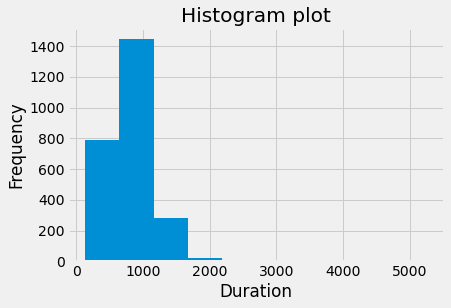

In [20]:
plt.hist(duration)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram plot")
plt.show() 

In [21]:
class Kernel_density:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
    
    def fit(self, Xi):
        self.Xi = Xi
        self.n = len(Xi)
        
    def score_samples(self, X_d):
        problist = []
        _2pi = np.sqrt((math.pi)*2)
        for x in X_d:
            temp = [abs(_2pi * (1/self.bandwidth)* np.exp((-1/2)*((x-xi)/self.bandwidth)**2)) for xi in self.Xi]
            problist.append((sum(temp)[0]/self.n))
        
        return problist

In [22]:
x_d = np.linspace(0,5000,5000)
x = np.array(duration)
my_kdf = Kernel_density(bandwidth=10)
my_kdf.fit(x[:,None])

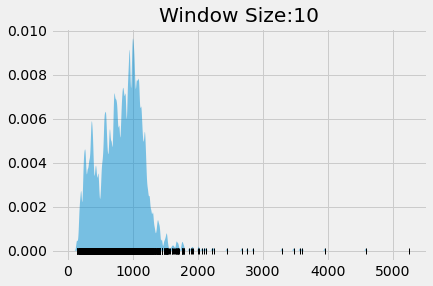

In [23]:
logprob1 = my_kdf.score_samples(x_d[:,None])

plt.fill_between(x_d,np.array(logprob1),alpha = 0.5)
plt.plot(x,np.full_like(x,-0.01), '|k')
plt.title("Window Size:10")
plt.show()

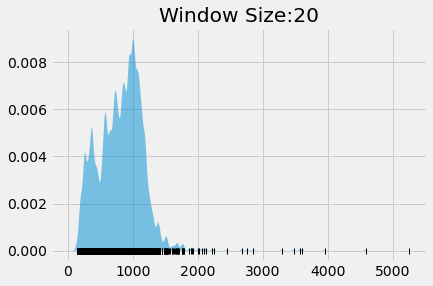

In [24]:
my_kdf_w20 = Kernel_density(bandwidth=20)
my_kdf_w20.fit(x[:,None])

logprob1_w20 = my_kdf_w20.score_samples(x_d[:,None])

plt.fill_between(x_d,np.array(logprob1_w20),alpha = 0.5)
plt.plot(x,np.full_like(x,-0.01), '|k')
plt.title("Window Size:20")
plt.show()


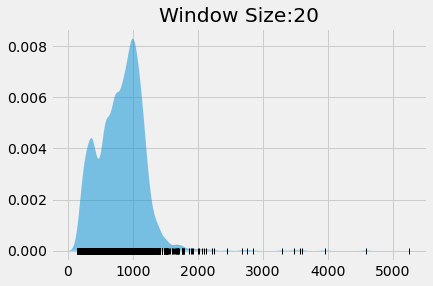

In [25]:
my_kdf_w50 = Kernel_density(bandwidth=50)
my_kdf_w50.fit(x[:,None])

logprob1_w50 = my_kdf_w50.score_samples(x_d[:,None])

plt.fill_between(x_d,np.array(logprob1_w50),alpha = 0.5)
plt.plot(x,np.full_like(x,-0.01), '|k')
plt.title("Window Size:20")
plt.show()


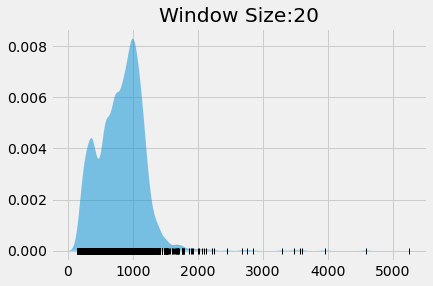

In [26]:
my_kdf_w100 = Kernel_density(bandwidth=50)
my_kdf_w100.fit(x[:,None])

logprob1_w100 = my_kdf_w100.score_samples(x_d[:,None])

plt.fill_between(x_d,np.array(logprob1_w100),alpha = 0.5)
plt.plot(x,np.full_like(x,-0.01), '|k')
plt.title("Window Size:20")
plt.show()

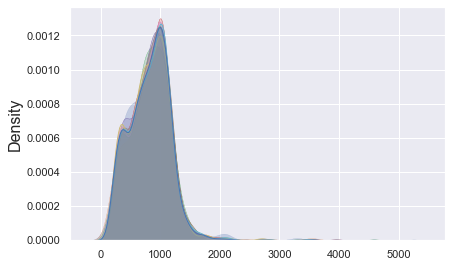

In [31]:
import seaborn as sns, numpy as np
import random
sns.set(); np.random.seed(0)

n=250
while(n<=2500):
    sns.kdeplot(data=random.choices(duration,k=n),label='n={}'.format(n),shade=True,linewidth = n/2500)
    n = n + 250
sns.kdeplot(data=duration,label='Main distribution',shade=True)

plt.ylabel('Density', fontsize=16)
plt.show()

In [32]:
x_d = np.linspace(0,5000,5000)
from sklearn.neighbors import KernelDensity
x = np.array(duration)
kdf = KernelDensity(bandwidth=10,kernel='gaussian')
kdf.fit(x[:,None])


KernelDensity(bandwidth=10)

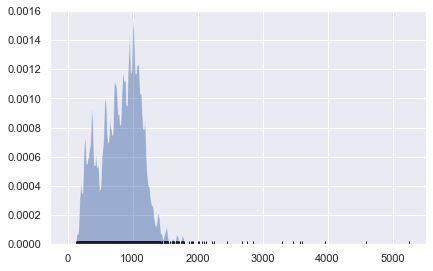

In [33]:
logprob = kdf.score_samples(x_d[:,None])

plt.fill_between(x_d,np.exp(logprob),alpha = 0.5)
plt.plot(x,np.full_like(x,-0.01), '|k')
plt.ylim(-0.000001,0.0016)
plt.show()